# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [8]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,405,88,40,73,173,68,7,150,44,19,137,174,341,151,69,2,20,196,200
1,164,98,54,104,186,59,10,213,32,24,172,223,665,217,73,1,26,186,195
2,534,90,39,57,114,48,7,135,51,18,139,155,261,151,85,12,8,183,182
3,451,94,37,74,169,59,7,162,41,20,133,178,394,130,63,6,6,198,204
4,403,96,39,77,160,62,8,140,47,18,150,161,294,124,62,15,3,201,208
5,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
6,85,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
7,230,85,35,47,110,55,3,117,57,17,122,136,203,139,89,5,9,180,184
8,426,106,53,98,203,63,11,220,30,25,167,228,710,214,71,10,24,188,197
9,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,414.129326,93.908925,45.010929,82.265938,169.571949,61.750455,8.582878,169.504554,40.777778,20.632058,148.382514,189.216758,443.488160,175.783242,72.510018,6.431694,12.484517,188.990893,195.659381
std,249.440987,8.131834,6.232704,15.807532,33.801816,7.677678,4.444196,33.388972,7.873879,2.588463,14.698780,31.643636,176.999893,32.854446,7.646524,5.057821,8.849834,6.130121,7.403307
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,196.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,151.000000,68.000000,2.000000,5.000000,185.000000,191.000000
50%,411.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,638.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,600.000000,200.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,186.000000,320.000000,998.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.fit_transform(X_test)

### Explanation:
# I try to use scaling method "Standard deviation"(StandardScaler in sklearn) and use Panda
# DataFrame to convert data into rows and columns

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

The best parameters are {'C': 206.913808111479, 'l1_ratio': 0.30000000000000004, 'penalty': 'elasticnet'}
F1 score of this model:  0.8296746186114858
Accuracy score of this model:  0.835016835016835


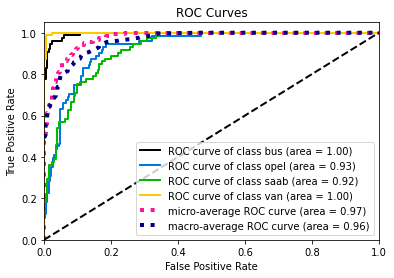

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import scikitplot
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}

clf = GridSearchCV(lr, param_grid, cv=5).fit(X_train_scaled, y_train)
print("The best parameters are %s" % (clf.best_params_))
y_predicted = clf.predict(X_test_scaled)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", clf.score(X_test_scaled, y_test))
    
# Plot the ROC-curve
predicted_proba = clf.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

In [38]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

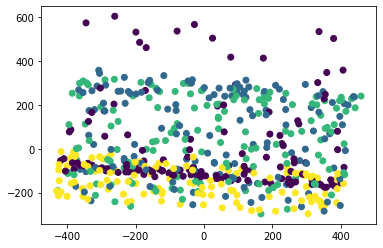

In [14]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y_train_changed = le.fit_transform(y_train)
pca = PCA()
X_train_fit = pca.fit_transform(X_train)
plt.scatter(X_train_fit[:,0], X_train_fit[:,1], c=y_train_changed)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [15]:
### YOUR CODE HERE
print(pca.components_)

[[ 9.93352246e-01  5.37273466e-03  3.65762404e-03  8.76220276e-03
   1.41124750e-02 -7.96458528e-04 -3.85495332e-04  2.11744735e-02
  -5.09470206e-03  1.57092612e-03  8.03001223e-03  1.66300731e-02
   1.08798591e-01  1.64447529e-02 -1.81618459e-03  2.22601666e-04
   1.16855883e-03  8.61460500e-04  1.22782680e-03]
 [-1.15040839e-01  3.50652949e-02  2.86127854e-02  7.50037283e-02
   1.35855615e-01  6.51453365e-03  4.69123042e-03  1.76166423e-01
  -3.99834221e-02  1.36060414e-02  6.35774666e-02  1.59777416e-01
   9.36966168e-01  1.41973177e-01 -2.06340844e-04  8.46434331e-04
   9.96538989e-03 -3.14821218e-04  4.37166809e-03]
 [ 1.70011352e-03  5.35475875e-02 -1.76756445e-02  1.15775670e-01
   8.65037044e-01  2.47346078e-01  8.27573445e-02  1.03456692e-03
  -3.73302091e-02 -3.46557914e-03 -4.48388641e-02  1.71757743e-01
  -1.35949482e-01 -2.07347051e-01 -9.46246053e-02  7.20231831e-03
   3.96142834e-02  1.56772338e-01  1.93777979e-01]
 [ 1.03626253e-03 -4.02216487e-02  1.21076622e-01  1.70

$\textbf{Answer:}$ The data is very small, approximate 0. So we should normalize the data

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

The best parameters are {'C': 0.03359818286283781, 'l1_ratio': 0.30000000000000004, 'penalty': 'elasticnet'}
F1 score of this model:  0.5209633370598212
Accuracy score of this model:  0.5387205387205387


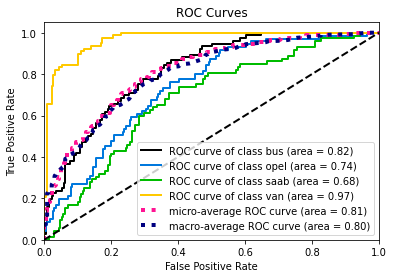

In [19]:
### YOUR CODE HERE
# pca transform for X_test 
X_test_fit = pca.fit_transform(X_test)
# Increase max_iter
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}
clf = GridSearchCV(lr, param_grid, cv=5).fit(X_train_fit, y_train)
print("The best parameters are %s" % (clf.best_params_))
y_predicted = clf.predict(X_test_fit)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", clf.score(X_test_fit, y_test))

# Plot the ROC-curve
predicted_proba = clf.predict_proba(X_test_fit)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

The max_depth are 11
F1 score of this model:  0.6770583737364464
Accuracy score of this model:  0.6868686868686869


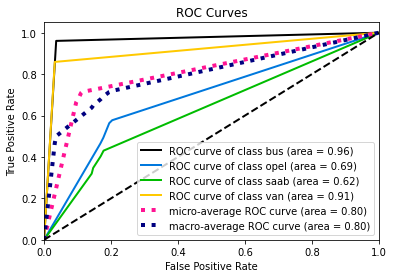

In [20]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

lr = DecisionTreeClassifier()
param_grid = {
    "max_depth": np.linspace(1, 32, 32, dtype=np.int16),
    'criterion': ["gini", "entropy"]
}
clf = GridSearchCV(lr, param_grid, cv=5).fit(X_train_scaled, y_train)
print("The max_depth are %s" % (clf.best_params_['max_depth']))

y_predicted = clf.predict(X_test_scaled)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", clf.score(X_test_scaled, y_test))

# Plot the ROC-curve
predicted_proba = clf.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

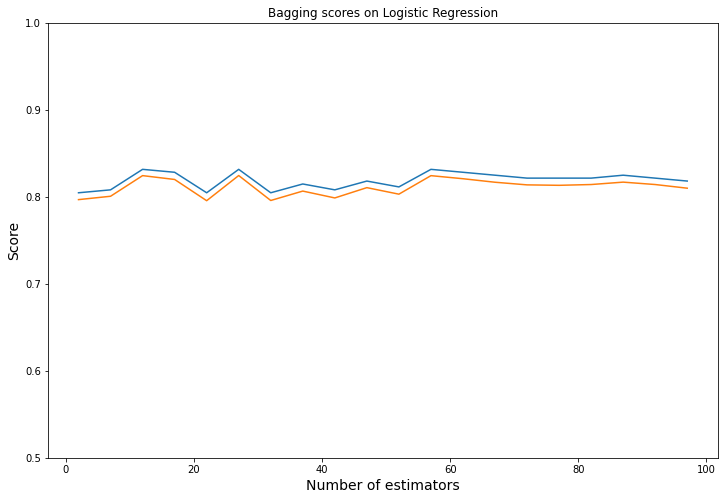

In [25]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

N = np.arange(2, 100, 5, dtype=np.int16) 
count = len(N)

accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.6158, l1_ratio=0.9, penalty='elasticnet')
for i in range(count):
    clf = BaggingClassifier(lr, n_estimators=N[i])
    clf.fit(X_train_scaled, y_train)
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

                            
plt.figure(figsize=(12, 8))
plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(N, accuracy_score, label='accuracy score')
plt.plot(N, f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Bagging scores on Logistic Regression")
plt.show()

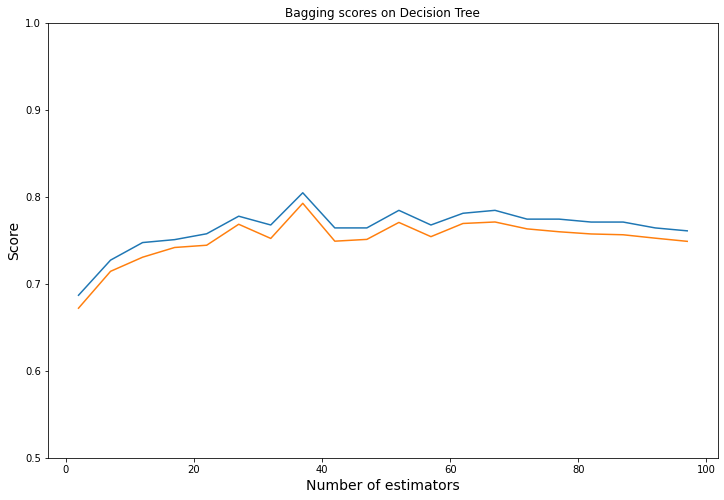

In [26]:
accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

lr = DecisionTreeClassifier()
for i in range(count):
    clf = BaggingClassifier(lr, n_estimators=N[i])
    clf.fit(X_train_scaled, y_train)
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

                            
plt.figure(figsize=(12, 8))
plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(N, accuracy_score, label='accuracy score')
plt.plot(N, f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Bagging scores on Decision Tree")
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

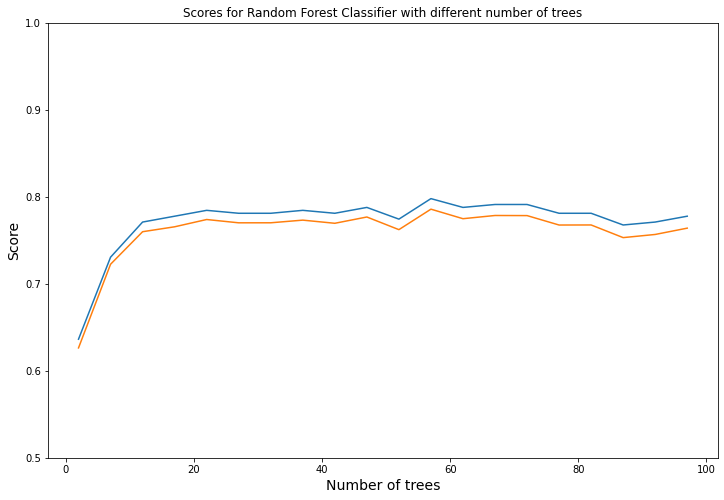

In [27]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
param_grid = {'n_estimators': np.linspace(1, 100, 100, dtype=np.int16)}
lr = RandomForestClassifier(random_state=42)

accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

for i in range(count):
    clf = RandomForestClassifier(random_state=42, n_estimators=N[i])
    clf.fit(X_train_scaled, y_train)
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

    
plt.figure(figsize=(12, 8))
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(N, accuracy_score, label='accuracy score')
plt.plot(N, f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Scores for Random Forest Classifier with different number of trees")
plt.show()



#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

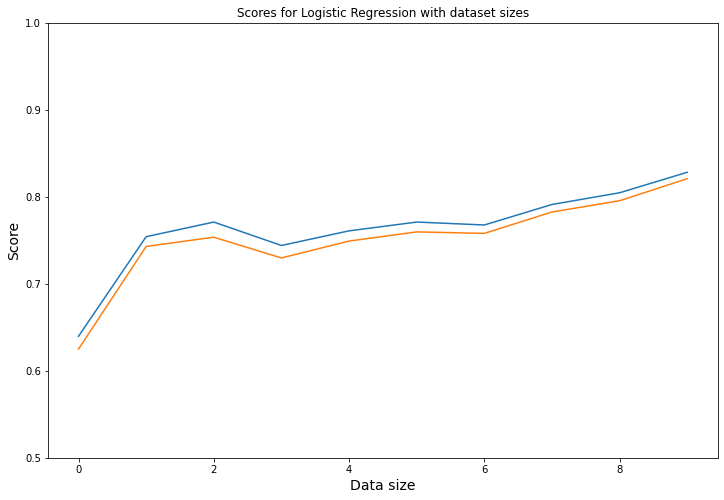

In [31]:
# YOUR CODE HERE
accuracy_score = np.zeros(10)
f1_test_score = np.zeros(10)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.6158, l1_ratio=0.9, penalty='elasticnet')

for i in range(10):
    data_size = int(X_train.shape[0] * (i + 1) / 10)
    clf = lr.fit(X_train_scaled[:data_size], y_train[:data_size])
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')
    
    
plt.figure(figsize=(12, 8))
plt.xlabel("Data size", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(np.arange(10), accuracy_score, label='accuracy score')
plt.plot(np.arange(10), f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Scores for Logistic Regression with dataset sizes")
plt.show()


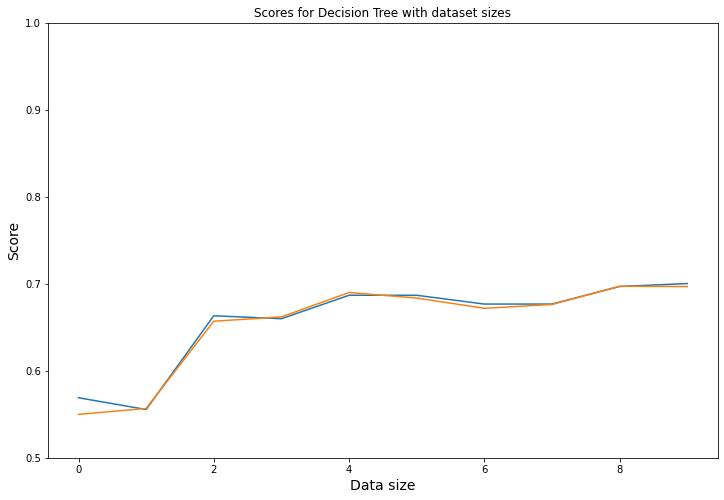

In [32]:
accuracy_score = np.zeros(10)
f1_test_score = np.zeros(10)

lr = DecisionTreeClassifier()

for i in range(10):
    data_size = int(X_train.shape[0] * (i + 1) / 10)
    clf = lr.fit(X_train_scaled[:data_size], y_train[:data_size])
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')
    
    
plt.figure(figsize=(12, 8))
plt.xlabel("Data size", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(np.arange(10), accuracy_score, label='accuracy score')
plt.plot(np.arange(10), f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Scores for Decision Tree with dataset sizes")
plt.show()

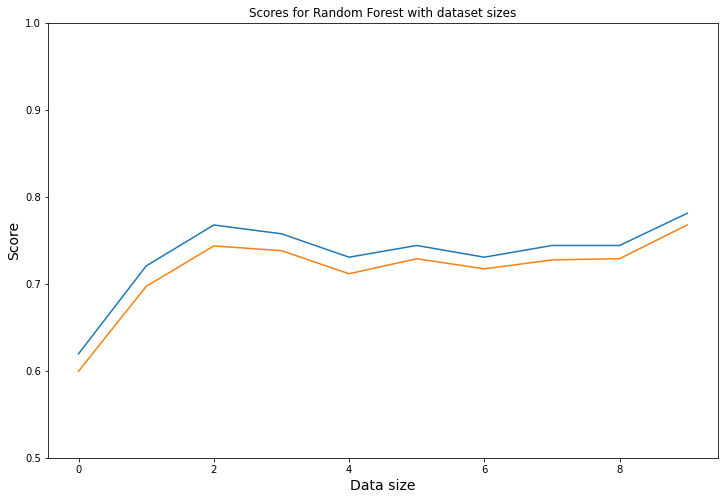

In [33]:
accuracy_score = np.zeros(10)
f1_test_score = np.zeros(10)

lr = RandomForestClassifier(random_state=42)

for i in range(10):
    data_size = int(X_train.shape[0] * (i + 1) / 10)
    clf = lr.fit(X_train_scaled[:data_size], y_train[:data_size])
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')
    
    
plt.figure(figsize=(12, 8))
plt.xlabel("Data size", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(np.arange(10), accuracy_score, label='accuracy score')
plt.plot(np.arange(10), f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Scores for Random Forest with dataset sizes")
plt.show()